<a href="https://colab.research.google.com/github/perigor/biblioteca_pandas/blob/main/RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nesse projeto apliquei conhecimentos de limpeza e organização de dados (data cleaning & data wrangling) para estruturar uma base de dados para modelagem.


Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de
recência, frequência e ticket médio (RFM) dos seus clientes.
A saber RFM:
R (Recency): Tempo que o cliente realizou a última compra (em dias)
F (Frequency): Quantidade de compras realizadas pelo cliente
M (Monetary): Valor do ticket médio gasto pelo cliente
onde ticket médio = média do total gasto por pedido para cada cliente.
Para isso, vocês receberam uma base de dados (arquivo csv) e devem construir um
código em Python que gera um output também csv, porém contendo apenas a
identificação do cliente e métricas RFM.


In [ ]:
# Importando bibliotecas.

import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt

In [ ]:
# Importando base de dados.

df = pd.read_csv("/content/drive/MyDrive/AulasDNC/Desafio 5 - Preparar o dataset para modelagem/data.csv",  header= 0, encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Contagem de dados nulos.

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Usando função "dropna" para fazer remoção de dado nulos.

df.dropna(subset=['CustomerID', 'Description'], inplace=True)

In [ ]:
# Recontagem de nulos

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Verificando distribuição dos dados.

df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<Axes: >

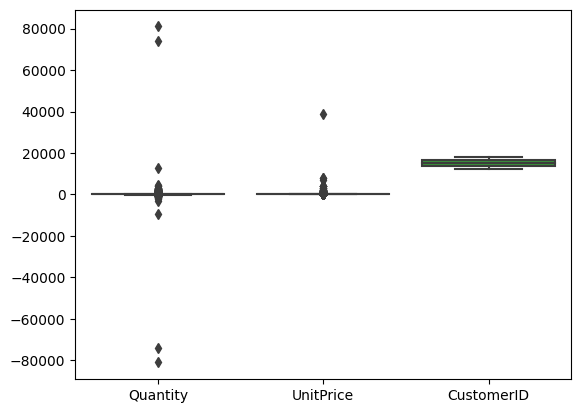

In [ ]:
# Verificando outliers com boxplot.

sns.boxplot(df)

In [ ]:
# Verificando dados estatísticos da coluna Quantity.

df["Quantity"].describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

Text(0.5, 1.0, 'Quantity')

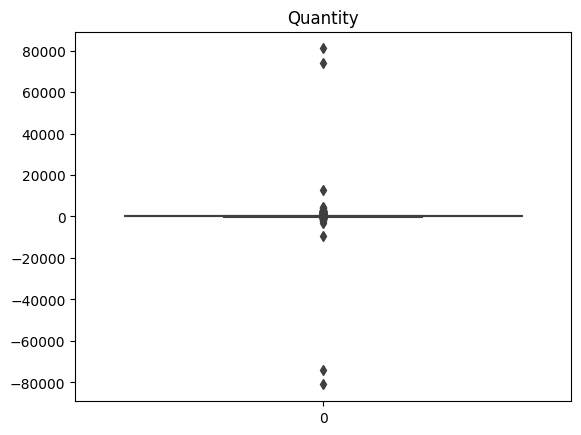

In [ ]:
# Plotagem da coluna Quantity para melhor vizualização.

sns.boxplot(df['Quantity']).set_title('Quantity')

In [ ]:
# Localizando os outliers que necessitam serem removidos.

df.loc[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
# Utilizando a função drop para remover os outliers negativos.

df = df.drop(df[df['Quantity'] <= 0].index)
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Text(0.5, 1.0, 'Quantity')

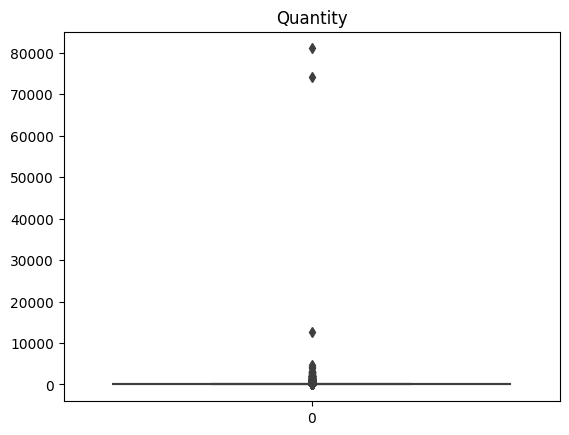

In [ ]:
# Plotagem da coluna Quantity após a remoção de outliers negativos.

sns.boxplot(df['Quantity']).set_title('Quantity')

In [ ]:
# Verificando dados estatísticos da coluna Quantity após a remoção de outliers negativos.

df["Quantity"].describe()

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
# Verificando dados estatísticos da coluna UnitPrice.

df["UnitPrice"].describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Text(0.5, 1.0, 'UnitPrice')

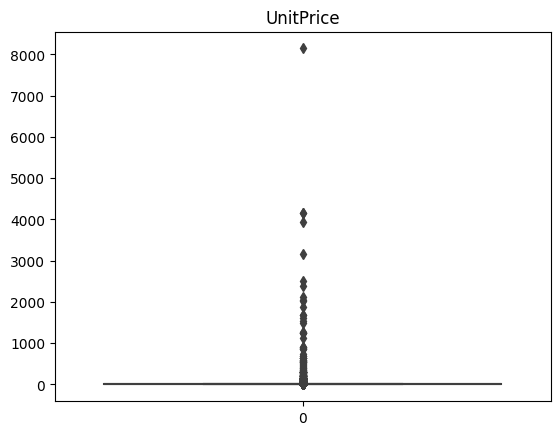

In [ ]:
# Plotagem da coluna UnitPrice para melhor vizualização.

sns.boxplot(df['UnitPrice']).set_title('UnitPrice')

In [ ]:
# Utilizando a função drop para remover os outliers negativos.

df = df.drop(df[df['UnitPrice'] <= 0].index)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Verificando dados estatísticos da coluna UnitPrice após remoção dos outliers negativos.

df["UnitPrice"].describe()

count    397884.000000
mean          3.116488
std          22.097877
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Text(0.5, 1.0, 'UnitPrice')

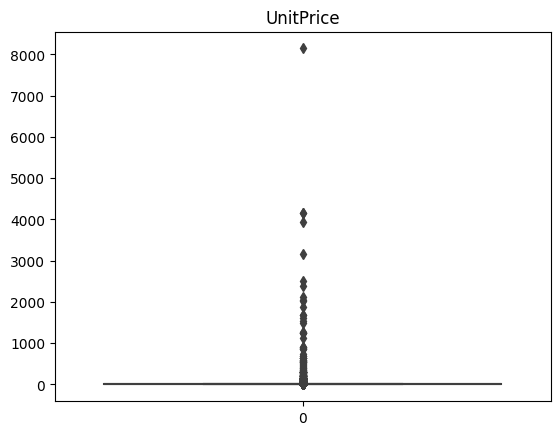

In [ ]:
# Plotagem da coluna UnitPrice após remoção dos outliers negativos para melhor vizualização.

sns.boxplot(df['UnitPrice']).set_title('UnitPrice')

In [ ]:
# Identificando valores duplicados.

df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Removendo dados duplicados.

df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Verificando tipos de dados das colunas.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.4+ MB


In [ ]:
# Corrijindo o tipo de dado do CustomerID.
# Transformar os valores da coluna "CustomerID" de float para int.

df['CustomerID'] = df['CustomerID'].astype(int)


In [ ]:
import datetime as datetime

In [ ]:
# Corrijindo o tipo de dado do InvoiceDate.
# Transformar os valores da coluna "InvoiceDate" de object para datetime.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Verificando tipos de dados das colunas após correção de "CustomerID" e "Invoice Date"

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 35.4+ MB


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
# Tratando outliers de valores extremos.

<Axes: >

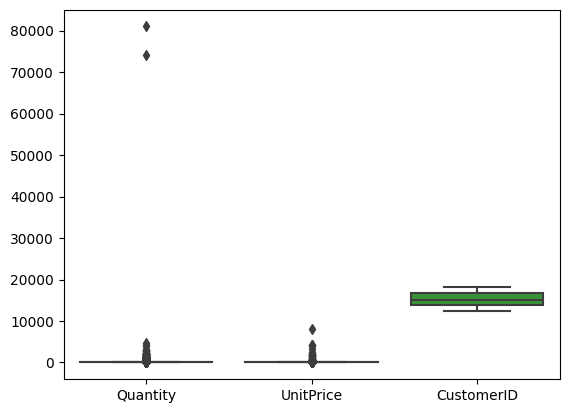

In [ ]:
sns.boxplot(df)

In [ ]:
# Removendo outliers em que a quantidade da compra é superior a 10k.

df = df.drop(df[df['Quantity'] > 10000].index)

In [ ]:
# Removendo outlier em que o preço unitário é maior que 5k.

df = df.drop(df[df['UnitPrice'] > 5000].index)

<Axes: >

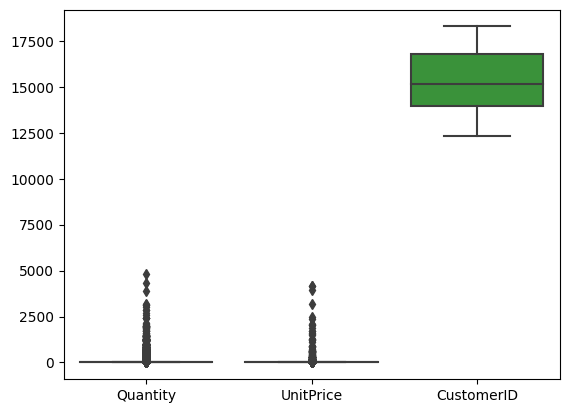

In [ ]:
# Plotagem de gráfico após tratamento de dados extremos.

sns.boxplot(df)

In [ ]:
# Criando um coluna adicicional com nome de Preço Total da Compra.

df['Preco_Total_Compra'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preco_Total_Compra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
# Ultima data.

max(df["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [ ]:
ultima_data = max(df["InvoiceDate"])
ultima_data

Timestamp('2011-12-09 12:50:00')

In [ ]:
df['Country'].reset_index()

,index,Country
0,0,United Kingdom
1,1,United Kingdom
2,2,United Kingdom
3,3,United Kingdom
4,4,United Kingdom
...,...,...
397876,541904,France
397877,541905,France
397878,541906,France
397879,541907,France


In [ ]:
# Verificando total de compras por país.

df_country_compras = df.groupby('Country')['Preco_Total_Compra'].sum()

df_country_compras.reset_index()

,Country,Preco_Total_Compra
0,Australia,138521.310
1,Austria,10198.680
2,Bahrain,548.400
3,Belgium,41196.340
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20450.440
7,Cyprus,13590.380
8,Czech Republic,826.740
9,Denmark,18955.340


In [ ]:
# Ordenando o dataframe pelo top 10 países compradores.

df1 = df_country_compras.sort_values(ascending=False).head(10)
df1.reset_index()

,Country,Preco_Total_Compra
0,United Kingdom,7054595.604
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


In [ ]:
# Criando um novo dataframe para plotagem de gráfico.

df_new = pd.DataFrame({'Country': df1.index, 'Preco_Total_Compra': df1.values})
df_new

,Country,Preco_Total_Compra
0,United Kingdom,7054595.604
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


Text(0.5, 1.0, 'Top 10 países com maior valor de vendas')

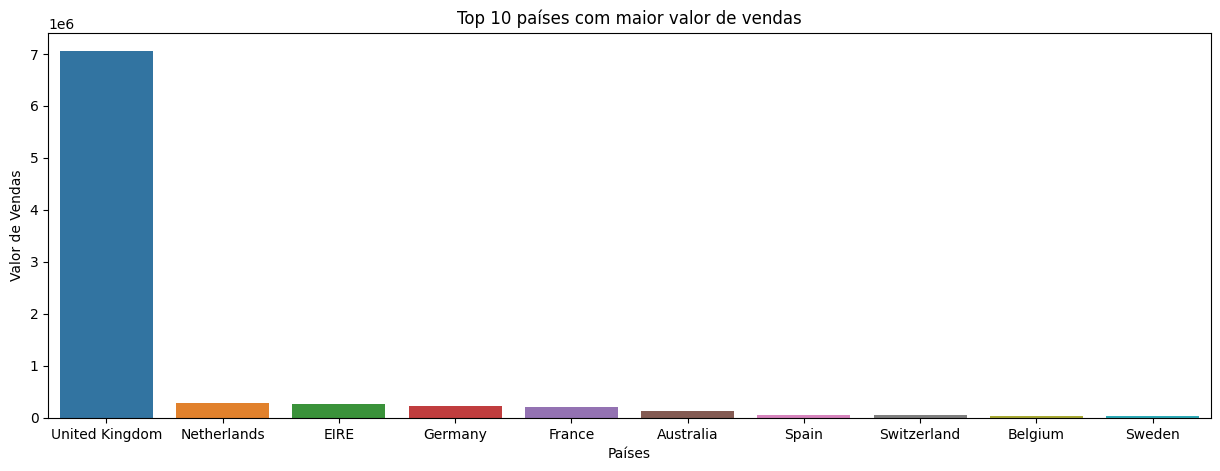

In [ ]:
# Top 10 países com maior valor em vendas.

plt.figure(figsize=(15,5))
sns.barplot(data=df_new, x='Country', y='Preco_Total_Compra')
plt.xlabel('Países')
plt.ylabel('Valor de Vendas')
plt.title('Top 10 países com maior valor de vendas')

In [ ]:
# Verificando total de produtos.

df_mais_vendidos = df.groupby('Description')['Quantity'].sum()

df_mais_vendidos.reset_index()

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,140
1,50'S CHRISTMAS GIFT BAG LARGE,1885
2,DOLLY GIRL BEAKER,2398
3,I LOVE LONDON MINI BACKPACK,360
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3871,ZINC T-LIGHT HOLDER STARS SMALL,4894
3872,ZINC TOP 2 DOOR WOODEN SHELF,10
3873,ZINC WILLIE WINKIE CANDLE STICK,2607
3874,ZINC WIRE KITCHEN ORGANISER,25


In [ ]:
# Organizando por ordem decrescente top 10.

df2 = df_mais_vendidos.sort_values(ascending=False).head(10)
df2.reset_index()

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1,JUMBO BAG RED RETROSPOT,46181
2,WHITE HANGING HEART T-LIGHT HOLDER,36725
3,ASSORTED COLOUR BIRD ORNAMENT,35362
4,PACK OF 72 RETROSPOT CAKE CASES,33693
5,POPCORN HOLDER,30931
6,RABBIT NIGHT LIGHT,27202
7,MINI PAINT SET VINTAGE,26076
8,PACK OF 12 LONDON TISSUES,25345
9,PACK OF 60 PINK PAISLEY CAKE CASES,24264


In [ ]:
# Criando um novo dataframe Top 10 produtos para plotagem de gráfico.

df_new1 = pd.DataFrame({'Description': df2.index, 'Quantity': df2.values})
df_new1

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1,JUMBO BAG RED RETROSPOT,46181
2,WHITE HANGING HEART T-LIGHT HOLDER,36725
3,ASSORTED COLOUR BIRD ORNAMENT,35362
4,PACK OF 72 RETROSPOT CAKE CASES,33693
5,POPCORN HOLDER,30931
6,RABBIT NIGHT LIGHT,27202
7,MINI PAINT SET VINTAGE,26076
8,PACK OF 12 LONDON TISSUES,25345
9,PACK OF 60 PINK PAISLEY CAKE CASES,24264


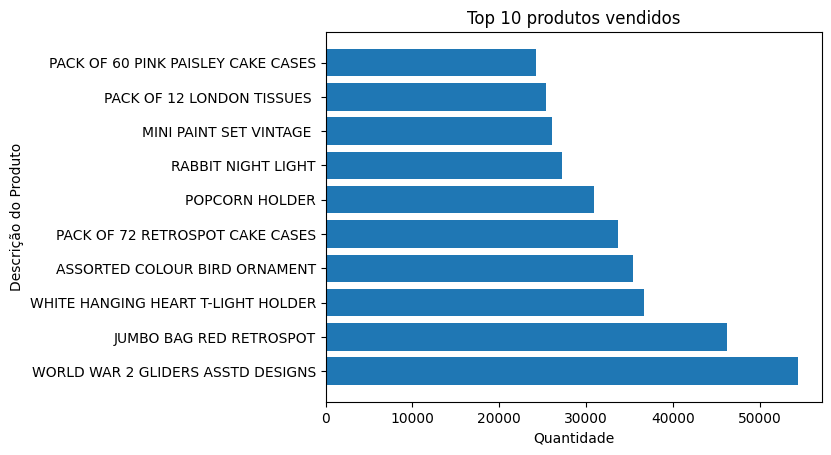

In [ ]:
# Plotagem Top 10 produtos vendidos.

plt.barh(df_new1['Description'], df_new1['Quantity'])
plt.xlabel('Quantidade')
plt.ylabel('Descrição do Produto')
plt.title('Top 10 produtos vendidos')
plt.show()

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preco_Total_Compra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
# Agrupando o dataframe pelo mês e calculando a soma do preço total de compra.

df_grouped = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Preco_Total_Compra'].sum()

In [ ]:
# Criando um novo dataframe com os dados agrupados.

df_new2 = pd.DataFrame({'Mês': df_grouped.index.strftime('%Y-%m'), 'Preco_Total_Compra': df_grouped.values})

df_new2

,Mês,Preco_Total_Compra
0,2010-12,572713.890
1,2011-01,492261.440
2,2011-02,447137.350
3,2011-03,595500.760
4,2011-04,469200.361
5,2011-05,670451.810
6,2011-06,661213.690
7,2011-07,600091.011
8,2011-08,645343.900
9,2011-09,952838.382


Text(0.5, 1.0, 'Valor de venda total por mês')

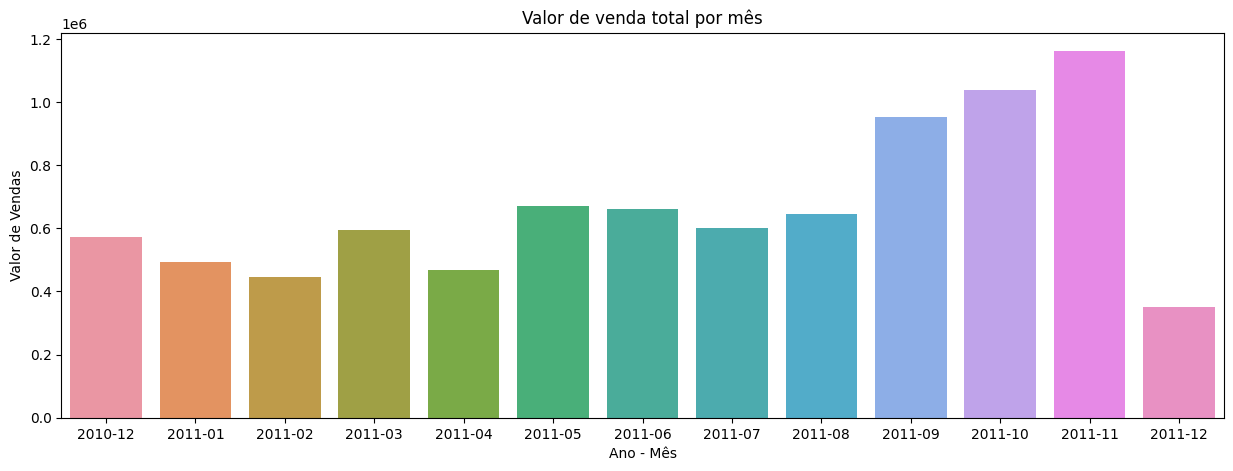

In [ ]:
# Valor de venda total por mês.

plt.figure(figsize=(15,5))
sns.barplot(data=df_new2, x='Mês', y='Preco_Total_Compra')
plt.xlabel('Ano - Mês')
plt.ylabel('Valor de Vendas')
plt.title('Valor de venda total por mês')

In [ ]:
# Convertendo a coluna InvoiceDate para o tipo datetime.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Agrupe o dataframe pelo país e pela data da compra e calcule a soma do preço total de compra.
df_grouped1 = df.groupby(['Country', pd.Grouper(key='InvoiceDate', freq='M')])['Preco_Total_Compra'].sum()

# Criando um novo dataframe com os dados agrupados
df_new3 = df_grouped1.reset_index()

In [ ]:
df_new3

,Country,InvoiceDate,Preco_Total_Compra
0,Australia,2010-12-31,1032.85
1,Australia,2011-01-31,9017.71
2,Australia,2011-02-28,14695.42
3,Australia,2011-03-31,17223.99
4,Australia,2011-04-30,771.60
...,...,...,...
282,Unspecified,2011-04-30,299.10
283,Unspecified,2011-05-31,852.68
284,Unspecified,2011-06-30,185.78
285,Unspecified,2011-07-31,798.48


In [ ]:
# Valor de venda total por mês.

# Agrupando os dados por país e mês e calcule a soma das vendas.
df_new4 = df.groupby([df['Country'], df['InvoiceDate'].dt.month])['Preco_Total_Compra'].sum().reset_index()

df_new4

,Country,InvoiceDate,Preco_Total_Compra
0,Australia,1,9017.71
1,Australia,2,14695.42
2,Australia,3,17223.99
3,Australia,4,771.60
4,Australia,5,13638.41
...,...,...,...
266,Unspecified,4,299.10
267,Unspecified,5,852.68
268,Unspecified,6,185.78
269,Unspecified,7,798.48


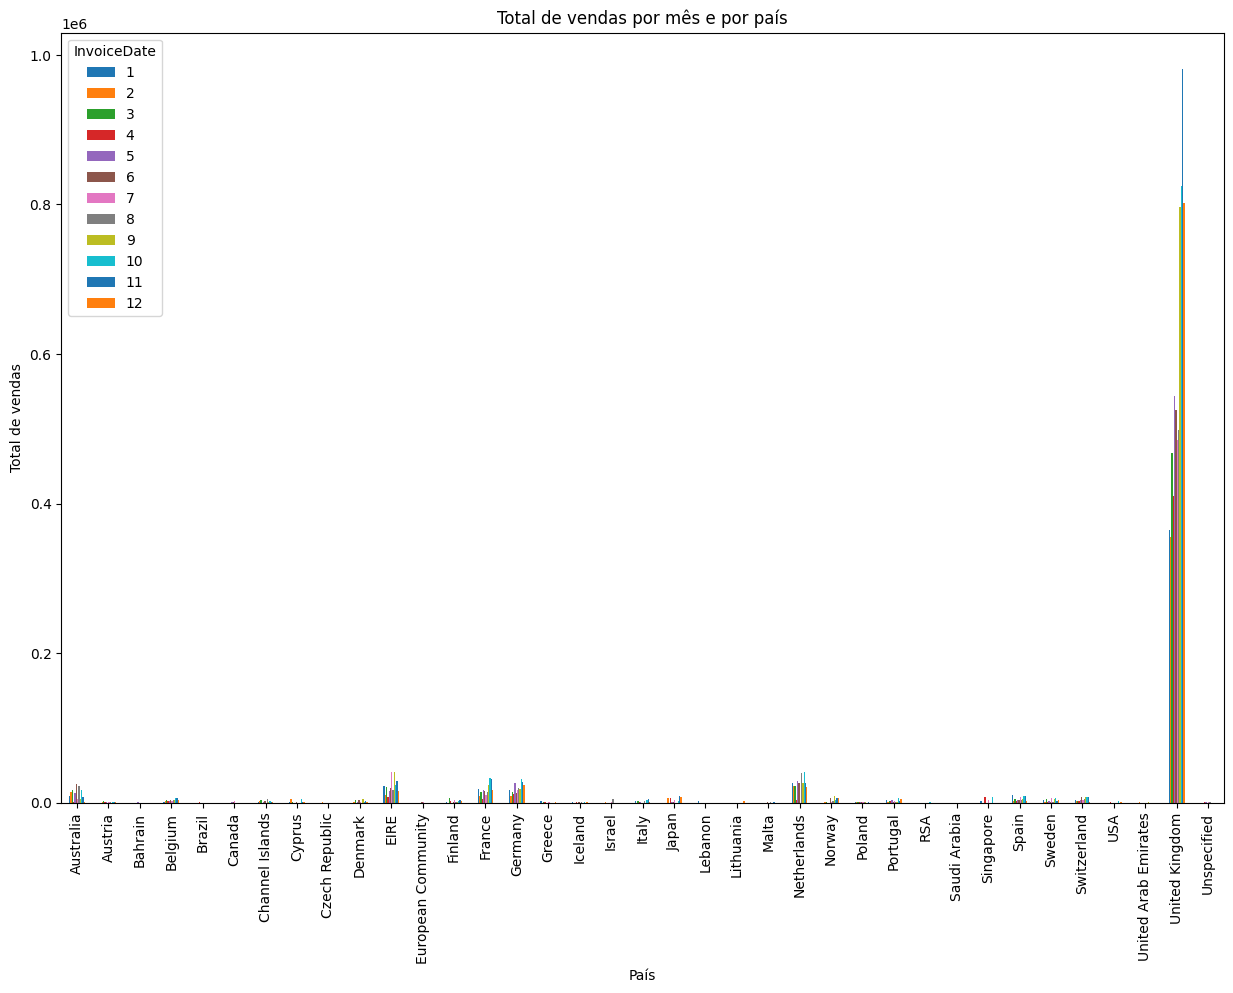

In [ ]:
# Criando o gráfico de barras de Total de vendas por mês e por país.

fig, ax = plt.subplots(figsize=(15, 10))
df_new4.pivot(index='Country', columns='InvoiceDate', values='Preco_Total_Compra').plot(kind='bar', ax=ax)

# Adicionando um título e rótulos aos eixos.

ax.set_title('Total de vendas por mês e por país')
ax.set_xlabel('País')
ax.set_ylabel('Total de vendas')

plt.show()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preco_Total_Compra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Agrupando dados por "CustomerId" e "InvoiceNo" para obter a data e o preço total do pedido.

df.groupby(['CustomerID', 'InvoiceDate']).agg({'Preco_Total_Compra': 'sum'})

Preco_Total_Compra
CustomerID InvoiceDate                            
12347      2010-12-07 14:57:00              711.79
           2011-01-26 14:30:00              475.39
           2011-04-07 10:43:00              636.25
           2011-06-09 13:01:00              382.52
           2011-08-02 08:48:00              584.91
...                                            ...
18283      2011-11-30 12:59:00              223.61
           2011-12-06 12:02:00              208.00
18287      2011-05-22 10:39:00              765.28
           2011-10-12 10:23:00             1001.32
           2011-10-28 09:29:00               70.68

[18437 rows x 1 columns]

In [ ]:
# Agrupando dados por "CustomerId" para calcular o RFM.

df.groupby(['CustomerID']).agg({'InvoiceDate': 'first', 'Preco_Total_Compra': 'sum'})

,InvoiceDate,Preco_Total_Compra
CustomerID,,
12347,2010-12-07 14:57:00,4310.00
12348,2010-12-16 19:09:00,1797.24
12349,2011-11-21 09:51:00,1757.55
12350,2011-02-02 16:01:00,334.40
12352,2011-02-16 12:33:00,2506.04
...,...,...
18280,2011-03-07 09:52:00,180.60
18281,2011-06-12 10:53:00,80.82
18282,2011-08-05 13:35:00,178.05


In [ ]:
# Importando o pacote RFM

 !pip install rfm

In [ ]:
from rfm import RFM

In [ ]:
# "rfn_table" retorna a tabela RFM resultante DF gerada com recência, frequência e valores monetários e pontuações junto com segmentos

rfm = RFM(df, customer_id='CustomerID', transaction_date='InvoiceDate', amount='Preco_Total_Compra')
rfm.rfm_table

,CustomerID,recency,frequency,monetary_value,r,f,m,rfm_score,segment
0,12347,1,182,4309.96,5,5,5,555,Champions
1,15804,0,262,4205.75,5,5,5,555,Champions
2,14299,7,143,3964.70,5,5,5,555,Champions
3,17511,2,963,91061.32,5,5,5,555,Champions
4,15867,4,459,3809.50,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
4332,13161,312,8,112.75,1,1,1,111,Lost
4333,17956,248,1,12.75,1,1,1,111,Lost
4334,13144,332,3,110.95,1,1,1,111,Lost
4335,17325,279,6,96.80,1,1,1,111,Lost


In [ ]:
# Visualizando as top categorias de clientes.

rfm.segment_table

,segment,no of customers
0,Champions,914
1,Loyal Accounts,807
2,Low Spenders,411
3,Potential Loyalist,304
4,Promising,100
5,New Active Accounts,46
6,Need Attention,51
7,About to Sleep,395
8,At Risk,590
9,Lost,719


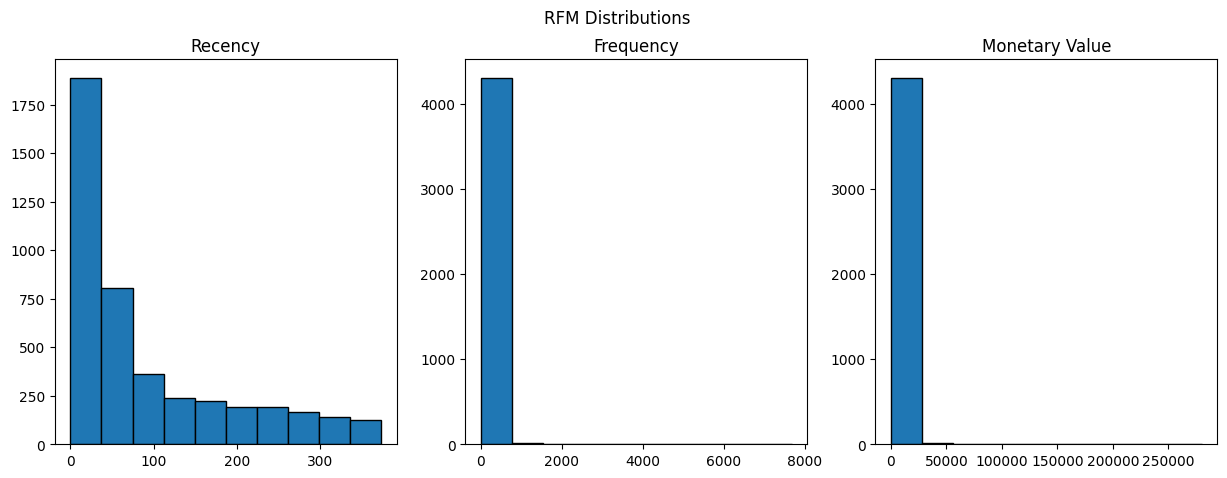

In [ ]:
 # Plotagem de gráficos de recência, frequência e histogramas monetários em uma única linha.

 rfm.plot_rfm_histograms()

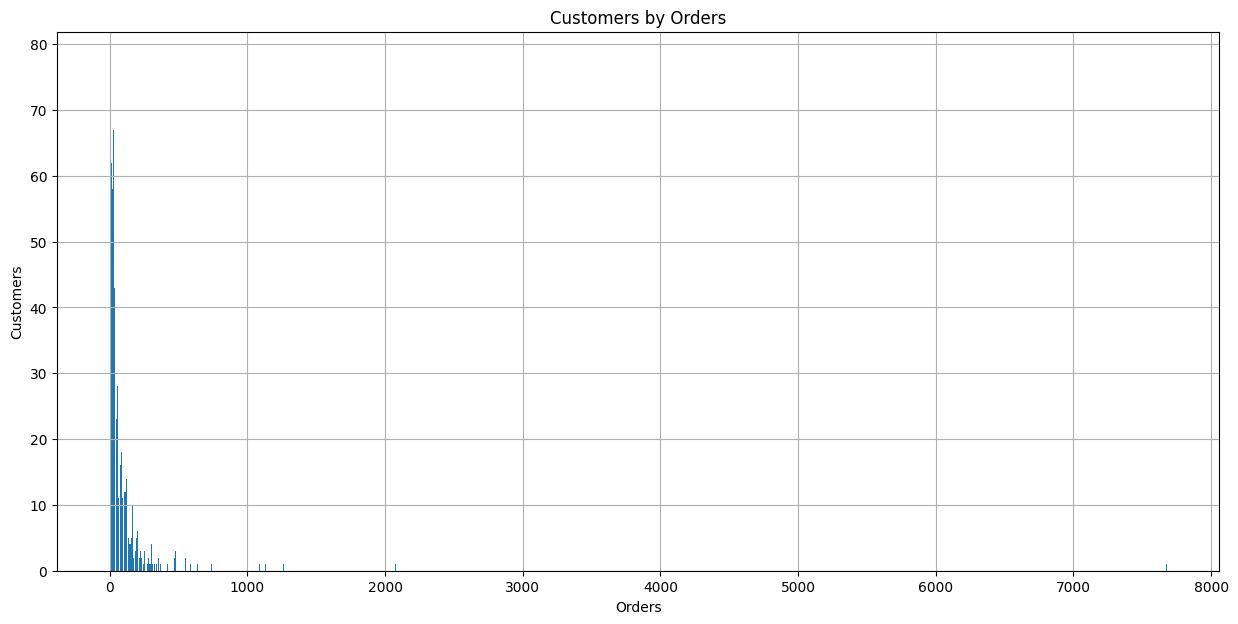

In [ ]:
# Plotagem de pedidos por número de cliente.

rfm.plot_rfm_order_distribution()

In [ ]:
# Plotagem de clientes campeões.
rfm.find_customers('Champions')

,CustomerID,recency,frequency,monetary_value,r,f,m,rfm_score,segment
0,12347,1,182,4309.96,5,5,5,555,Champions
1,15804,0,262,4205.75,5,5,5,555,Champions
2,14299,7,143,3964.70,5,5,5,555,Champions
3,17511,2,963,91061.32,5,5,5,555,Champions
4,15867,4,459,3809.50,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
909,13456,17,63,1766.40,4,4,4,444,Champions
910,17158,31,67,1266.81,4,4,4,444,Champions
911,16531,21,77,1244.35,4,4,4,444,Champions
912,17738,18,97,1878.97,4,4,4,444,Champions
